In [1]:
import pandas as pd
import numpy as np
import ast

In [2]:
def string_to_list(s):
    if (pd.isna(s)) or (s==''):
        return np.nan 
    
    # Use ast.literal_eval to safely evaluate string representations of lists
    try:
        parsed_list = ast.literal_eval(s)
    except (ValueError, SyntaxError):
        # Fallback in case of any parsing errors
        parsed_list = s.strip('[]').split(',')

    # Strip any extra whitespace and quotes
    return [item.strip().strip('"').strip("'") for item in parsed_list]

In [3]:
df_books = pd.read_csv('../Input/books_data.csv',
                       usecols=['Title', 'authors', 'publisher', 'publishedDate', 'categories'],
                    #    nrows=1000,
                       converters={
    'authors': string_to_list,
    'categories': string_to_list}
    )

In [4]:

df_ratings = pd.read_csv('../Input/Books_rating.csv')
df_ratings['time'] = pd.to_datetime(df_ratings['time'], unit='s')


In [12]:
df_ratings['Title'].value_counts().sort_index()

Title
" Film technique, " and, " Film acting "                                                                                                    2
" We'll Always Have Paris": The Definitive Guide to Great Lines from the Movies                                                             2
"... And Poetry is Born ..." Russian Classical Poetry                                                                                       1
"A Titanic hero" Thomas Andrews, shipbuilder                                                                                                8
"A Truthful Impression of the Country": British and American Travel Writing in China, 1880-1949                                             1
                                                                                                                                           ..
with an everlasting love                                                                                                                   21


In [5]:

# Titles present in both DataFrames
df = pd.merge(df_books, df_ratings, on='Title')

# Titles present in df_books but not in df_ratings
titles_only_in_books = df_books[~df_books['Title'].isin(df_ratings['Title'])]

# Titles present in df_ratings but not in df_books
titles_only_in_ratings = df_ratings[~df_ratings['Title'].isin(df_books['Title'])]

# Output counts
titles_in_both_count = len(df)
titles_only_in_books_count = len(titles_only_in_books)
titles_only_in_ratings_count = len(titles_only_in_ratings)

# Display the results
print(f"Number of titles present in both DataFrames: {titles_in_both_count}")
print(f"Number of titles present only in df_books: {titles_only_in_books_count}")
print(f"Number of titles present only in df_ratings: {titles_only_in_ratings_count}")


Number of titles present in both DataFrames: 3000000
Number of titles present only in df_books: 0
Number of titles present only in df_ratings: 0


In [ ]:
df.to_parquet('../Input/joined.parquet')

In [6]:
del df_ratings, df_books

In [7]:
print(df.shape)
df.head()

(3000000, 13)


,Title,authors,publisher,publishedDate,categories,Id,Price,User_id,profileName,score,time,summary,text
0,Its Only Art If Its Well Hung!,[Julie Strain],NaN,1996,[Comics & Graphic Novels],1882931173,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,1999-10-23,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,[Philip Nel],A&C Black,2005-01-01,[Biography & Autobiography],0826414346,NaN,A30TK6U7DNS82R,Kevin Killian,5.0,2004-09-21,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,[Philip Nel],A&C Black,2005-01-01,[Biography & Autobiography],0826414346,NaN,A3UH4UZ4RSVO82,John Granger,5.0,2004-03-09,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,[Philip Nel],A&C Black,2005-01-01,[Biography & Autobiography],0826414346,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",4.0,2004-07-25,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,[Philip Nel],A&C Black,2005-01-01,[Biography & Autobiography],0826414346,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",4.0,2005-02-10,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [8]:
df_authors = df.explode('authors')

In [10]:
df_authors.groupby('authors')['score'].mean().sort_values()

authors
Florence Lemoine             1.0
Benjamin Nathaniel Bogue     1.0
Robert Higham                1.0
Tanya R. Davis               1.0
David Barash                 1.0
                            ... 
黒田領治                         5.0
문진미디어편집부                     5.0
알렉상드르 뒤마(Alexandre Dumas)    5.0
편집부                          5.0
108cd                        5.0
Name: score, Length: 153056, dtype: float64

In [11]:
df_categories = df.explode('categories')

In [24]:
df_categories.groupby('categories').size().value_counts().sort_index()

1         3002
2         1564
3          872
4          646
5          478
          ... 
89988        1
98035        1
107791       1
207542       1
824439       1
Name: count, Length: 473, dtype: int64

<Axes: xlabel='categories'>

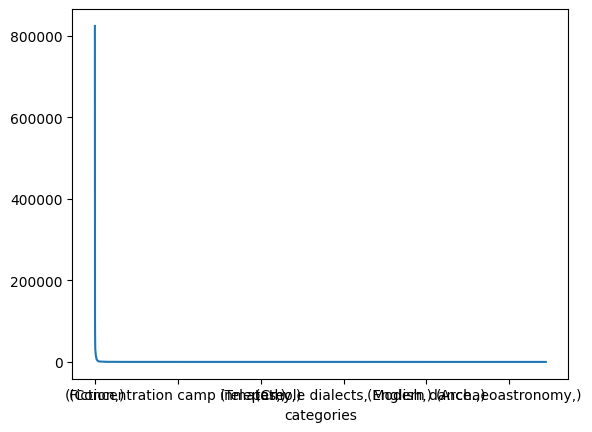

In [18]:
df_categories[['categories']].value_counts().plot()

In [12]:
df_categories.groupby('categories')['score'].mean().sort_values()

categories
A Grow and Learn Library                     1.0
360-degree feedback (Rating of employees)    1.0
Autodesk Inventor (Electronic resource)      1.0
Expressionism (Art)                          1.0
Barbary horse                                1.0
                                            ... 
Yosemite National Park (Calif.)              5.0
Abalone fisheries                            5.0
Abacus                                       5.0
AIDS (Disease) and art                       5.0
ABible                                       5.0
Name: score, Length: 10883, dtype: float64